Bronfmann 1988: arxiv:astro-ph/0610769

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [29]:
MP = [[2.25,0.11,0.42,39,77],            #MESSWERTE R, North, South, z0, z1/2 (ZH)
[2.75,0.07,0.49,36,80],
[3.25,0.27,0.38,0,61],
[3.75,0.34,0.63,-8,65],
[4.25,0.91,0.65,1,71],
[4.75,1.23,0.49,-10,72],
[5.25,1.29,0.72,-1,82],
[5.75,1.15,0.63,-4,83],
[6.25,0.95,0.71,-19,73],
[6.75,0.56,0.87,-22,63],
[7.25,0.73,0.93,-14,58],
[7.75,0.64,0.83,-9,72],
[8.25,0.41,0.5,-4,80],
[8.75,0.28,0.37,13,66],
[9.25,0.63,0.29,-4,23],
[9.75,0.22,0.18,-20,147]]

x=np.linspace(1,16,16)
y=x.copy()
north = x.copy()
south = x.copy()
z0=x.copy()
zH=x.copy()
for i in range(len(y)):
    x[i]=MP[i][0]
    north[i]=MP[i][1]
    south[i]=MP[i][2]
    y[i]=(north[i]+south[i])/2
    z0[i]=MP[i][3]
    zH[i]=MP[i][4]


In [30]:
"""Linear Interpoliert und Rescaliert auf R_Sonne = 8.5 kpc"""
def Bronf_R(R):
    R=R/0.85
    if R<=2.25:
        return 0
    else:
        if R>=9.75:
            return 0
        else:
            i = int(R*2 -4.5)+1
            return 1/0.85*(y[i-1]+(y[i]-y[i-1])/(x[i]-x[i-1])*(R-x[i-1]))

def Bronf_z0(R):
    R=R/0.85
    if R<=2.25:
        return 0
    else:
        if R>=9.75:
            return 0
        else:
            i = int(R*2 -4.5)+1
            return 1/0.85*(z0[i-1]+(z0[i]-z0[i-1])/(x[i]-x[i-1])*(R-x[i-1]))

def Bronf_zH(R):
    R=R/0.85
    if R<=2.25:
        return 1000
    else:
        if R>=9.75:
            return 1000
        else:
            i = int(R*2 -4.5)+1
            return 1/0.85*(zH[i-1]+(zH[i]-zH[i-1])/(x[i]-x[i-1])*(R-x[i-1]))

In [31]:
"""Zusammenführen der Komponenten"""
def Bronfmann1988(R,z):
    return Bronf_R(R)*np.exp(-(z-Bronf_z0(R))**2*np.log(2)/(Bronf_zH(R))**2) 

In [45]:
"""1D Plot in Radiale Richtung"""
R=np.linspace(0,10,1000)
z=np.linspace(-200,200,500)
f=np.zeros((len(R),5))
g=np.zeros((len(z),4))
for i in range(len(R)):
    for j in range(5):
        f[i,j] = Bronfmann1988(R[i],100-50*j)
for i in range(len(z)):
    for j in range(4):
        g[i,j] = Bronfmann1988(2+2*j,z[i])

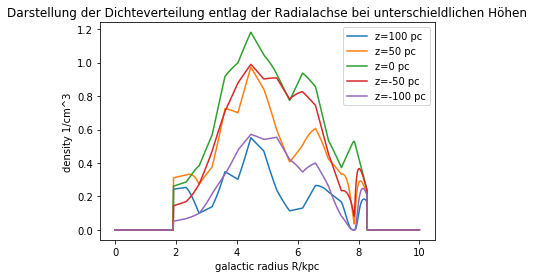

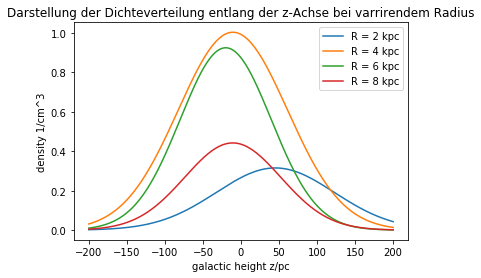

In [53]:
plt.figure()
plt.title('Darstellung der Dichteverteilung entlag der Radialachse bei unterschieldlichen Höhen')
for i in range(5):
    plt.plot(R,f[:,i],label='z={} pc'.format(100-50*i))
plt.legend()
"""plt.yscale('log')
plt.axis([0,10,10**-3,10**2])"""
plt.ylabel('density 1/cm^3')
plt.xlabel('galactic radius R/kpc')

plt.figure()
plt.title('Darstellung der Dichteverteilung entlang der z-Achse bei varrirendem Radius')
for i in range(4):
    plt.plot(z,g[:,i],label = 'R = {} kpc'.format(2+2*i))
plt.ylabel('density 1/cm^3')
plt.xlabel('galactic height z/pc')
plt.legend()
plt.show()

In [70]:
X,Y = np.meshgrid(R,z)
Z = np.zeros((len(R),len(z)))
for i in range(len(z)):
    for j in range(len(R)):
        Z[j,i]=Bronfmann1988(R[j],z[i])
Z = Z.T

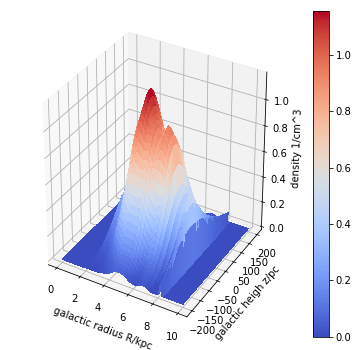

In [73]:
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p)
ax.set_zlabel('density 1/cm^3')
ax.set_ylabel('galactic heigh z/pc')
ax.set_xlabel('galactic radius R/kpc')
plt.show()
